# Import Packages

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns
sns.set(style='whitegrid')
import warnings 
warnings.filterwarnings('ignore')
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression,LinearRegression,Lasso,Ridge
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
import xgboost
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,PowerTransformer,MinMaxScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
#Module related to VIF 
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Moudles related to feature selection
from sklearn.feature_selection import RFE,SelectKBest,f_classif

In [131]:
# load the first csv file 
df1 = pd.read_csv("C:\\Users\\udayr\\movie_df.csv",header=None)
df1

,0,1,2,3,4,5
0,1.0,Spider-Man: Across the Spider-Verse,2023,9.1,86.0,140 min
1,2.0,The Dark Knight,2008,9.0,84.0,152 min
2,3.0,The Lord of the Rings: The Return of the King,2003,9.0,94.0,201 min
3,4.0,Inception,2010,8.8,74.0,148 min
4,5.0,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,92.0,178 min
5,6.0,The Lord of the Rings: The Two Towers,2002,8.8,87.0,179 min
6,7.0,The Matrix,1999,8.7,73.0,136 min
7,8.0,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,82.0,124 min
8,9.0,Soorarai Pottru,2020,8.7,NaN,153 min
9,10.0,Star Wars,1977,8.6,90.0,121 min


In [132]:
columns=['Sno','movie_name','year','ratings','Metascore','durations']

In [133]:
columns

['Sno', 'movie_name', 'year', 'ratings', 'Metascore', 'durations']

In [134]:
df1.columns=columns

In [135]:
df1

,Sno,movie_name,year,ratings,Metascore,durations
0,1.0,Spider-Man: Across the Spider-Verse,2023,9.1,86.0,140 min
1,2.0,The Dark Knight,2008,9.0,84.0,152 min
2,3.0,The Lord of the Rings: The Return of the King,2003,9.0,94.0,201 min
3,4.0,Inception,2010,8.8,74.0,148 min
4,5.0,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,92.0,178 min
5,6.0,The Lord of the Rings: The Two Towers,2002,8.8,87.0,179 min
6,7.0,The Matrix,1999,8.7,73.0,136 min
7,8.0,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,82.0,124 min
8,9.0,Soorarai Pottru,2020,8.7,NaN,153 min
9,10.0,Star Wars,1977,8.6,90.0,121 min


In [136]:
# load the second csv file
df2=pd.read_csv("C:\\Users\\udayr\\movie_d.csv",header=None)
df2

,0,1,2,3,4,5,6,7,8
0,Spider-Man: Across the Spider-Verse,2023,9.1,86,PG,Animation Action Adventure,9.1,76 498,140 min
1,The Dark Knight,2023,9.0,84,PG-13,Action Crime Drama,9.0,2 721 449,152 min
2,The Lord of the Rings: The Return of the King,2023,9.0,94,PG-13,Action Adventure Drama,9.0,1 888 889,201 min
3,Inception,2023,8.8,74,PG-13,Action Adventure Sci-Fi,8.8,2 415 635,148 min
4,The Lord of the Rings: The Fellowship of the Ring,2023,8.8,92,PG-13,Action Adventure Drama,8.8,1 917 501,178 min
5,The Lord of the Rings: The Two Towers,2023,8.8,87,PG-13,Action Adventure Drama,8.8,1 704 840,179 min
6,The Matrix,2023,8.7,73,R,Action Sci-Fi,8.7,1 959 851,136 min
7,Star Wars: Episode V - The Empire Strikes Back,2023,8.7,82,PG,Action Adventure Fantasy,8.7,1 322 448,124 min
8,Soorarai Pottru,2023,8.7,Not Available,TV-MA,Action Drama,8.7,119 563,153 min
9,Star Wars: Episode IV - A New Hope,2023,8.6,90,PG,Action Adventure Fantasy,8.6,1 394 867,121 min


In [137]:
columns2=['movie_name','year','ratings','Metascore','Certificate','genres','imdb_ratings','votes','durations']

In [138]:
df2.columns=columns2

In [139]:
df2

,movie_name,year,ratings,Metascore,Certificate,genres,imdb_ratings,votes,durations
0,Spider-Man: Across the Spider-Verse,2023,9.1,86,PG,Animation Action Adventure,9.1,76 498,140 min
1,The Dark Knight,2023,9.0,84,PG-13,Action Crime Drama,9.0,2 721 449,152 min
2,The Lord of the Rings: The Return of the King,2023,9.0,94,PG-13,Action Adventure Drama,9.0,1 888 889,201 min
3,Inception,2023,8.8,74,PG-13,Action Adventure Sci-Fi,8.8,2 415 635,148 min
4,The Lord of the Rings: The Fellowship of the Ring,2023,8.8,92,PG-13,Action Adventure Drama,8.8,1 917 501,178 min
5,The Lord of the Rings: The Two Towers,2023,8.8,87,PG-13,Action Adventure Drama,8.8,1 704 840,179 min
6,The Matrix,2023,8.7,73,R,Action Sci-Fi,8.7,1 959 851,136 min
7,Star Wars: Episode V - The Empire Strikes Back,2023,8.7,82,PG,Action Adventure Fantasy,8.7,1 322 448,124 min
8,Soorarai Pottru,2023,8.7,Not Available,TV-MA,Action Drama,8.7,119 563,153 min
9,Star Wars: Episode IV - A New Hope,2023,8.6,90,PG,Action Adventure Fantasy,8.6,1 394 867,121 min


In [140]:
frames = [df1, df2]

In [141]:
df= pd.concat(frames)
pd.set_option('display.max_columns', 500)
df

,Sno,movie_name,year,ratings,Metascore,durations,Certificate,genres,imdb_ratings,votes
0,1.0,Spider-Man: Across the Spider-Verse,2023,9.1,86.0,140 min,NaN,NaN,NaN,NaN
1,2.0,The Dark Knight,2008,9.0,84.0,152 min,NaN,NaN,NaN,NaN
2,3.0,The Lord of the Rings: The Return of the King,2003,9.0,94.0,201 min,NaN,NaN,NaN,NaN
3,4.0,Inception,2010,8.8,74.0,148 min,NaN,NaN,NaN,NaN
4,5.0,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,92.0,178 min,NaN,NaN,NaN,NaN
5,6.0,The Lord of the Rings: The Two Towers,2002,8.8,87.0,179 min,NaN,NaN,NaN,NaN
6,7.0,The Matrix,1999,8.7,73.0,136 min,NaN,NaN,NaN,NaN
7,8.0,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,82.0,124 min,NaN,NaN,NaN,NaN
8,9.0,Soorarai Pottru,2020,8.7,NaN,153 min,NaN,NaN,NaN,NaN
9,10.0,Star Wars,1977,8.6,90.0,121 min,NaN,NaN,NaN,NaN


In [142]:
df.dtypes

Sno             float64
movie_name       object
year              int64
ratings         float64
Metascore        object
durations        object
Certificate      object
genres           object
imdb_ratings    float64
votes            object
dtype: object

In [143]:
df.head()

,Sno,movie_name,year,ratings,Metascore,durations,Certificate,genres,imdb_ratings,votes
0,1.0,Spider-Man: Across the Spider-Verse,2023,9.1,86.0,140 min,NaN,NaN,NaN,NaN
1,2.0,The Dark Knight,2008,9.0,84.0,152 min,NaN,NaN,NaN,NaN
2,3.0,The Lord of the Rings: The Return of the King,2003,9.0,94.0,201 min,NaN,NaN,NaN,NaN
3,4.0,Inception,2010,8.8,74.0,148 min,NaN,NaN,NaN,NaN
4,5.0,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,92.0,178 min,NaN,NaN,NaN,NaN


In [144]:
columns=df.columns

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 49
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sno           50 non-null     float64
 1   movie_name    100 non-null    object 
 2   year          100 non-null    int64  
 3   ratings       100 non-null    float64
 4   Metascore     89 non-null     object 
 5   durations     100 non-null    object 
 6   Certificate   50 non-null     object 
 7   genres        50 non-null     object 
 8   imdb_ratings  50 non-null     float64
 9   votes         50 non-null     object 
dtypes: float64(3), int64(1), object(6)
memory usage: 8.6+ KB


In [146]:
df.duplicated().sum()

0

In [147]:
df.shape

(100, 10)

In [148]:
df.isnull().sum()

Sno             50
movie_name       0
year             0
ratings          0
Metascore       11
durations        0
Certificate     50
genres          50
imdb_ratings    50
votes           50
dtype: int64

In [149]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='most_frequent')
df=imputer.fit_transform(df)
df

array([[1.0, 'Spider-Man: Across the Spider-Verse', 2023, 9.1, 86.0,
        '140 min', 'PG-13', 'Action  Crime  Drama', 8.2, '1 014 909'],
       [2.0, 'The Dark Knight', 2008, 9.0, 84.0, '152 min', 'PG-13',
        'Action  Crime  Drama', 8.2, '1 014 909'],
       [3.0, 'The Lord of the Rings: The Return of the King', 2003, 9.0,
        94.0, '201 min', 'PG-13', 'Action  Crime  Drama', 8.2,
        '1 014 909'],
       [4.0, 'Inception', 2010, 8.8, 74.0, '148 min', 'PG-13',
        'Action  Crime  Drama', 8.2, '1 014 909'],
       [5.0, 'The Lord of the Rings: The Fellowship of the Ring', 2001,
        8.8, 92.0, '178 min', 'PG-13', 'Action  Crime  Drama', 8.2,
        '1 014 909'],
       [6.0, 'The Lord of the Rings: The Two Towers', 2002, 8.8, 87.0,
        '179 min', 'PG-13', 'Action  Crime  Drama', 8.2, '1 014 909'],
       [7.0, 'The Matrix', 1999, 8.7, 73.0, '136 min', 'PG-13',
        'Action  Crime  Drama', 8.2, '1 014 909'],
       [8.0, 'Star Wars: Episode V - The Empire S

In [150]:
df=pd.DataFrame(df,columns=columns)
df

,Sno,movie_name,year,ratings,Metascore,durations,Certificate,genres,imdb_ratings,votes
0,1.0,Spider-Man: Across the Spider-Verse,2023,9.1,86.0,140 min,PG-13,Action Crime Drama,8.2,1 014 909
1,2.0,The Dark Knight,2008,9.0,84.0,152 min,PG-13,Action Crime Drama,8.2,1 014 909
2,3.0,The Lord of the Rings: The Return of the King,2003,9.0,94.0,201 min,PG-13,Action Crime Drama,8.2,1 014 909
3,4.0,Inception,2010,8.8,74.0,148 min,PG-13,Action Crime Drama,8.2,1 014 909
4,5.0,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,92.0,178 min,PG-13,Action Crime Drama,8.2,1 014 909
5,6.0,The Lord of the Rings: The Two Towers,2002,8.8,87.0,179 min,PG-13,Action Crime Drama,8.2,1 014 909
6,7.0,The Matrix,1999,8.7,73.0,136 min,PG-13,Action Crime Drama,8.2,1 014 909
7,8.0,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,82.0,124 min,PG-13,Action Crime Drama,8.2,1 014 909
8,9.0,Soorarai Pottru,2020,8.7,Not Available,153 min,PG-13,Action Crime Drama,8.2,1 014 909
9,10.0,Star Wars,1977,8.6,90.0,121 min,PG-13,Action Crime Drama,8.2,1 014 909


In [151]:
df.isin([" "]).sum()

Sno             0
movie_name      0
year            0
ratings         0
Metascore       0
durations       0
Certificate     0
genres          0
imdb_ratings    0
votes           0
dtype: int64

In [152]:
pd.set_option('display.max_rows', 500)
df

,Sno,movie_name,year,ratings,Metascore,durations,Certificate,genres,imdb_ratings,votes
0,1.0,Spider-Man: Across the Spider-Verse,2023,9.1,86.0,140 min,PG-13,Action Crime Drama,8.2,1 014 909
1,2.0,The Dark Knight,2008,9.0,84.0,152 min,PG-13,Action Crime Drama,8.2,1 014 909
2,3.0,The Lord of the Rings: The Return of the King,2003,9.0,94.0,201 min,PG-13,Action Crime Drama,8.2,1 014 909
3,4.0,Inception,2010,8.8,74.0,148 min,PG-13,Action Crime Drama,8.2,1 014 909
4,5.0,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,92.0,178 min,PG-13,Action Crime Drama,8.2,1 014 909
5,6.0,The Lord of the Rings: The Two Towers,2002,8.8,87.0,179 min,PG-13,Action Crime Drama,8.2,1 014 909
6,7.0,The Matrix,1999,8.7,73.0,136 min,PG-13,Action Crime Drama,8.2,1 014 909
7,8.0,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,82.0,124 min,PG-13,Action Crime Drama,8.2,1 014 909
8,9.0,Soorarai Pottru,2020,8.7,Not Available,153 min,PG-13,Action Crime Drama,8.2,1 014 909
9,10.0,Star Wars,1977,8.6,90.0,121 min,PG-13,Action Crime Drama,8.2,1 014 909


In [153]:
df.isin(["Not Available"]).sum()

Sno              0
movie_name       0
year             0
ratings          0
Metascore       22
durations        0
Certificate      0
genres           0
imdb_ratings     0
votes            0
dtype: int64

In [154]:
df.isin(["Not Rated"]).sum()

Sno              0
movie_name       0
year             0
ratings          0
Metascore        0
durations        0
Certificate     10
genres           0
imdb_ratings     0
votes            0
dtype: int64

In [155]:
df.replace(to_replace="Not Rated", value=np.nan, inplace= True)
# df =df.dropna()
df.drop('Sno', axis=1, inplace= True)

In [156]:
df.replace(to_replace="Not Available", value=np.nan, inplace= True)

In [157]:
df

,movie_name,year,ratings,Metascore,durations,Certificate,genres,imdb_ratings,votes
0,Spider-Man: Across the Spider-Verse,2023,9.1,86.0,140 min,PG-13,Action Crime Drama,8.2,1 014 909
1,The Dark Knight,2008,9.0,84.0,152 min,PG-13,Action Crime Drama,8.2,1 014 909
2,The Lord of the Rings: The Return of the King,2003,9.0,94.0,201 min,PG-13,Action Crime Drama,8.2,1 014 909
3,Inception,2010,8.8,74.0,148 min,PG-13,Action Crime Drama,8.2,1 014 909
4,The Lord of the Rings: The Fellowship of the Ring,2001,8.8,92.0,178 min,PG-13,Action Crime Drama,8.2,1 014 909
5,The Lord of the Rings: The Two Towers,2002,8.8,87.0,179 min,PG-13,Action Crime Drama,8.2,1 014 909
6,The Matrix,1999,8.7,73.0,136 min,PG-13,Action Crime Drama,8.2,1 014 909
7,Star Wars: Episode V - The Empire Strikes Back,1980,8.7,82.0,124 min,PG-13,Action Crime Drama,8.2,1 014 909
8,Soorarai Pottru,2020,8.7,NaN,153 min,PG-13,Action Crime Drama,8.2,1 014 909
9,Star Wars,1977,8.6,90.0,121 min,PG-13,Action Crime Drama,8.2,1 014 909


In [158]:
df.isnull().sum()

movie_name       0
year             0
ratings          0
Metascore       22
durations        0
Certificate     10
genres           0
imdb_ratings     0
votes            0
dtype: int64

In [164]:
df['Metascore'].fillna(df['Metascore'].median(), inplace=True)
print(df)

                                           movie_name  year  ratings  \
0                 Spider-Man: Across the Spider-Verse  2023      9.1   
1                                     The Dark Knight  2008      9.0   
2       The Lord of the Rings: The Return of the King  2003      9.0   
3                                           Inception  2010      8.8   
4   The Lord of the Rings: The Fellowship of the Ring  2001      8.8   
5               The Lord of the Rings: The Two Towers  2002      8.8   
6                                          The Matrix  1999      8.7   
7      Star Wars: Episode V - The Empire Strikes Back  1980      8.7   
8                                     Soorarai Pottru  2020      8.7   
9                                           Star Wars  1977      8.6   
10                         Terminator 2: Judgment Day  1991      8.6   
11                               Shichinin no samurai  1954      8.6   
12                                            Seppuku  1962     

In [165]:
df.isnull().sum()

movie_name       0
year             0
ratings          0
Metascore        0
durations        0
Certificate     10
genres           0
imdb_ratings     0
votes            0
dtype: int64

In [170]:
df['Certificate'].fillna(method='ffill', inplace=True)

In [171]:
df.isnull().sum()

movie_name      0
year            0
ratings         0
Metascore       0
durations       0
Certificate     0
genres          0
imdb_ratings    0
votes           0
dtype: int64

In [176]:
# Value counts for every feature to check the missing again or unique values
for i in df.columns:
    print(df[i].value_counts())
    print('**********************************')

Spider-Man: Across the Spider-Verse                  2
Guardians of the Galaxy Vol. 3                       2
Heat                                                 2
North by Northwest                                   2
Star Wars: Episode VI - Return of the Jedi           2
The Dark Knight                                      2
Kantara                                              2
Dangal                                               2
K.G.F: Chapter 2                                     2
Vikram                                               2
Shershaah                                            2
Spider-Man: No Way Home                              2
Vikram Vedha                                         2
Jurassic Park                                        2
Indiana Jones and the Last Crusade                   2
1917                                                 2
Batman Begins                                        2
Kill Bill: Vol. 1                                    2
Die Hard  

# EDA

In [177]:
# split train data to continous and categorical varaiables.
num=df.select_dtypes(include=['float64','int64'])
cat=df.select_dtypes(include=['object'])

In [208]:
num

,year,ratings,imdb_ratings
0,2023,9.1,8.2
1,2008,9.0,8.2
2,2003,9.0,8.2
3,2010,8.8,8.2
4,2001,8.8,8.2
5,2002,8.8,8.2
6,1999,8.7,8.2
7,1980,8.7,8.2
8,2020,8.7,8.2
9,1977,8.6,8.2


In [185]:
cat

,movie_name,Metascore,durations,Certificate,genres,votes
0,Spider-Man: Across the Spider-Verse,86.0,140 min,PG-13,Action Crime Drama,1 014 909
1,The Dark Knight,84.0,152 min,PG-13,Action Crime Drama,1 014 909
2,The Lord of the Rings: The Return of the King,94.0,201 min,PG-13,Action Crime Drama,1 014 909
3,Inception,74.0,148 min,PG-13,Action Crime Drama,1 014 909
4,The Lord of the Rings: The Fellowship of the Ring,92.0,178 min,PG-13,Action Crime Drama,1 014 909
5,The Lord of the Rings: The Two Towers,87.0,179 min,PG-13,Action Crime Drama,1 014 909
6,The Matrix,73.0,136 min,PG-13,Action Crime Drama,1 014 909
7,Star Wars: Episode V - The Empire Strikes Back,82.0,124 min,PG-13,Action Crime Drama,1 014 909
8,Soorarai Pottru,77.0,153 min,PG-13,Action Crime Drama,1 014 909
9,Star Wars,90.0,121 min,PG-13,Action Crime Drama,1 014 909


# Create UDFs

In [181]:

# Create Data audit Report for continuous variables
def continuous_var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  
                      x.std(), x.var(), x.min(), x.quantile(0.01), x.quantile(0.05),
                          x.quantile(0.10),x.quantile(0.25),x.quantile(0.50),x.quantile(0.75), 
                              x.quantile(0.90),x.quantile(0.95), x.quantile(0.99),x.max()], 
                  index = ['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1', 
                               'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

In [182]:
# Descriptive analysis for continous data
num.apply(continuous_var_summary)

,year,ratings,imdb_ratings
N,100.000000,100.000000,100.000000
NMISS,0.000000,0.000000,0.000000
SUM,201339.000000,842.600000,831.300000
MEAN,2013.390000,8.426000,8.313000
MEDIAN,2023.000000,8.350000,8.200000
STD,15.892248,0.238522,0.203333
VAR,252.563535,0.056893,0.041344
MIN,1954.000000,8.200000,8.200000
P1,1958.950000,8.200000,8.200000
P5,1980.950000,8.200000,8.200000


In [183]:
# Descriptive analysis for categorical data
cat.describe(include='O')

,movie_name,Metascore,durations,Certificate,genres,votes
count,100,100.0,100,100,100,100
unique,59,54.0,40,8,20,50
top,Spider-Man: Across the Spider-Verse,77.0,140 min,PG-13,Action Crime Drama,1 014 909
freq,2,23.0,6,70,58,51


# Univariate analysis


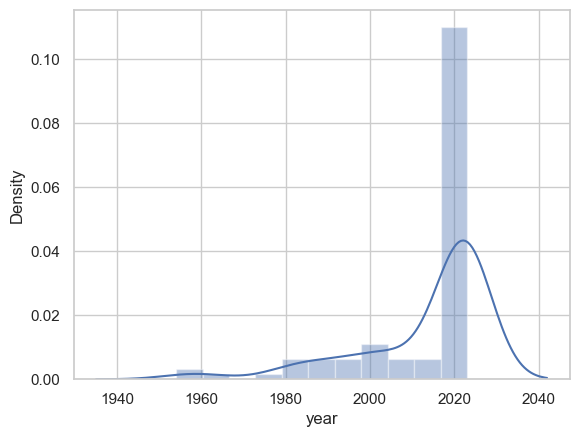

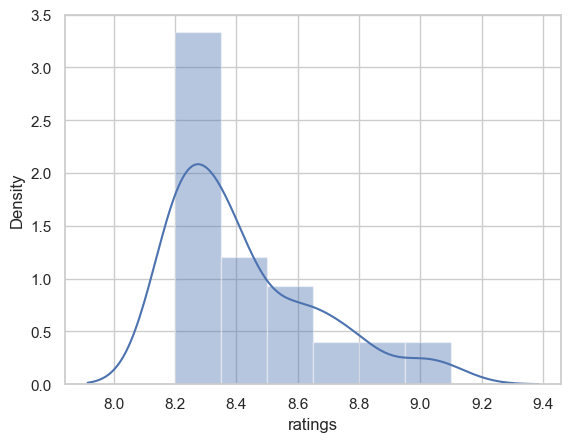

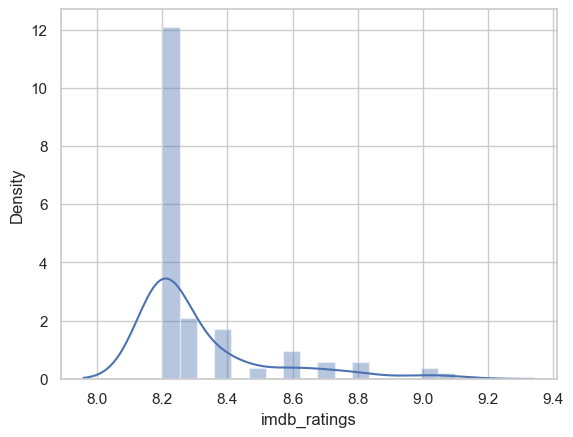

In [184]:
# Check Normality of continous data
for i in num.columns:
    sns.distplot(num[i])
    plt.show()

# Bivariate analysis


In [192]:
# top 20 rated movies according to  'ratings','Metascore'
for col in ['ratings','Metascore']:
    top_rated= df.sort_values(by=col ,ascending=False).head(20)
    figure=px.bar(top_rated,x='movie_name',y=col)
    figure.show()

TypeError: '>' not supported between instances of 'numpy.ndarray' and 'str'

In [195]:
# Checking the relation between year and  Targets variables

# Sort the DataFrame by the x-axis column in ascending order
df_sorted = df.sort_values(by='year')

# Create the plotly bar plot
fig = px.line(df_sorted, x='year', y='votes',width=1500, height=600)

# Display the plot
fig.show()

In [202]:
# # Relationship between categorical columns and Target variable (Gross)

# plt.figure(figsize=(20,35), facecolor='white')
# plotnumber = 1

# for i in ['Certification', 'Genre_1', 'Genre_2','Genre_3']:
#     if plotnumber<=4 :
#         ax = plt.subplot(2,2,plotnumber)
#         sns.boxenplot(x=df['Gross_Collection_$M'],y=df[i])
#         plt.ylabel(i,fontsize=20)
       
#     plotnumber+=1
# plt.show()

# Multivariate analysis


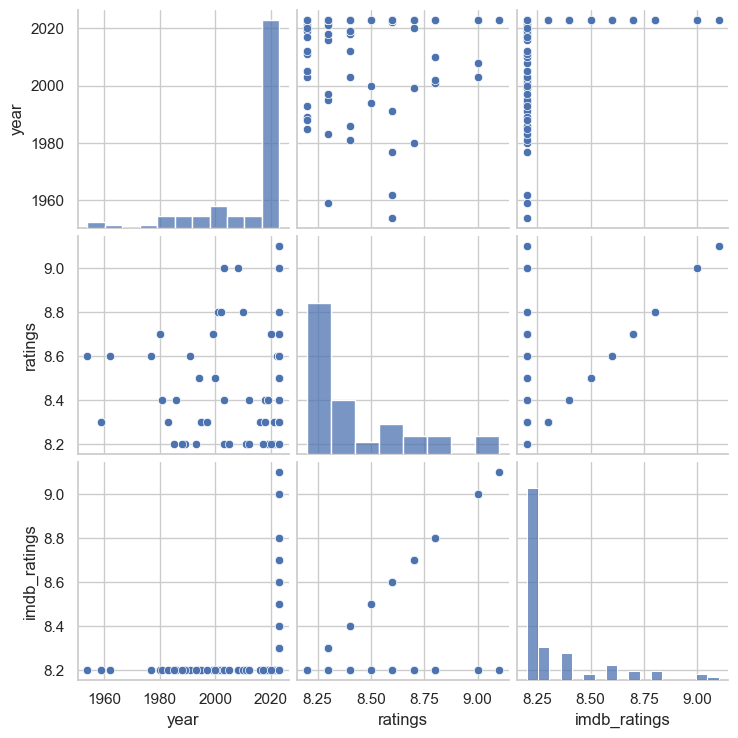

In [203]:
# Observe the Comparison between variables?

sns.pairplot(df)
plt.show()

## we will have two Dataframes one for predicting Votes and one for Gross_Collection_M.

In [205]:
# Drop year feature not needed anymore.
df.drop('year', axis=1,inplace=True)


In [206]:
df.columns

Index(['movie_name', 'ratings', 'Metascore', 'durations', 'Certificate',
       'genres', 'imdb_ratings', 'votes'],
      dtype='object')

# Outliers treatment


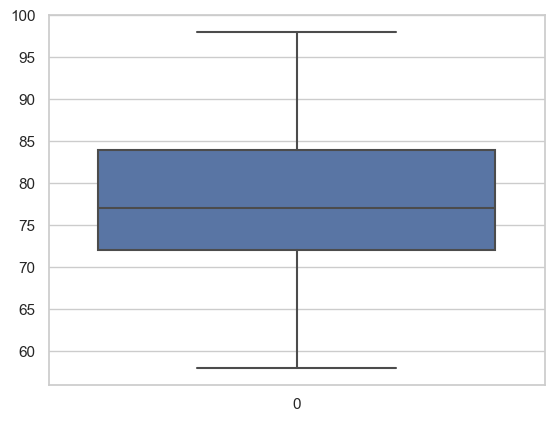

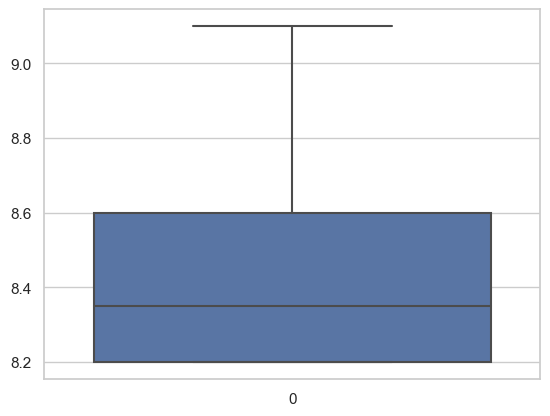

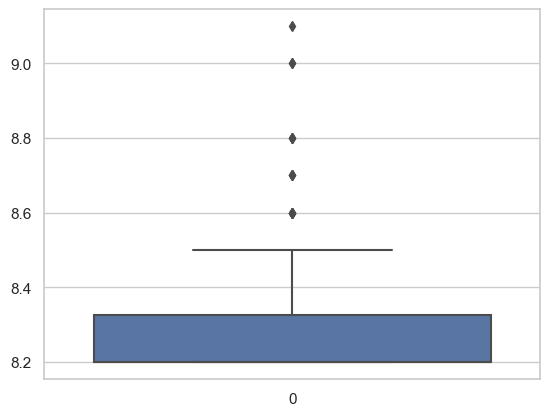

In [213]:
# Check outliers using boxplot
for col in ['Metascore','ratings','imdb_ratings']:
    sns.boxplot(df[col])
    plt.show()

In [228]:
# Check Skewness
df.skew()

ratings         1.133930
Metascore       0.340922
imdb_ratings    2.085717
dtype: float64

In [235]:
# Sort columns by datatypes
df.columns.to_series().groupby(df.dtypes).groups

{float64: ['ratings', 'imdb_ratings'], object: ['movie_name', 'Metascore', 'durations', 'Certificate', 'genres', 'votes']}

In [239]:
skew_cols=['ratings',  
'Metascore',     
'imdb_ratings']

In [240]:
# withing Power transformer to treat skewness
scaler = PowerTransformer()
df[skew_cols] = scaler.fit_transform(df[skew_cols].values)

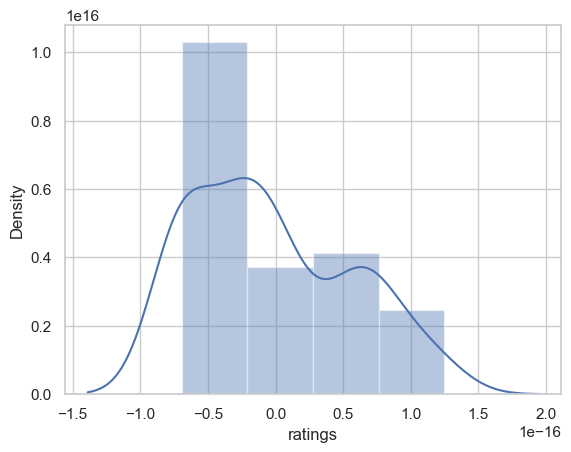

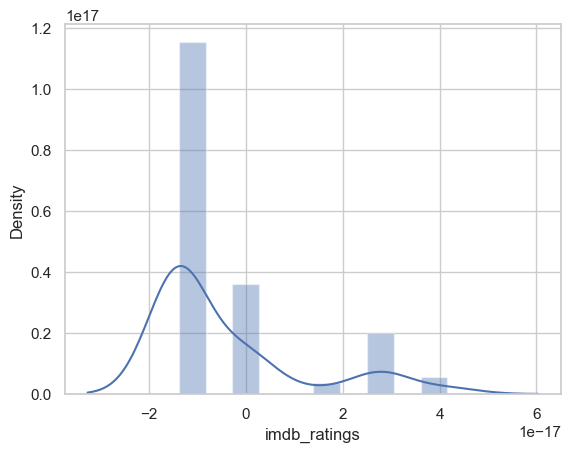

In [242]:
# Check Normality now
for i in ['ratings', 'imdb_ratings']:
    sns.distplot(df[i])
    plt.show()

In [243]:
# Check Skewness
df.skew()

ratings         0.000000
Metascore       0.000451
imdb_ratings    0.000000
dtype: float64

# Encoding


In [246]:
# Use getdummies and frequency for large  for nominal features 
    
df_new=pd.get_dummies(df,columns=['genres','Certificate'],drop_first=True)

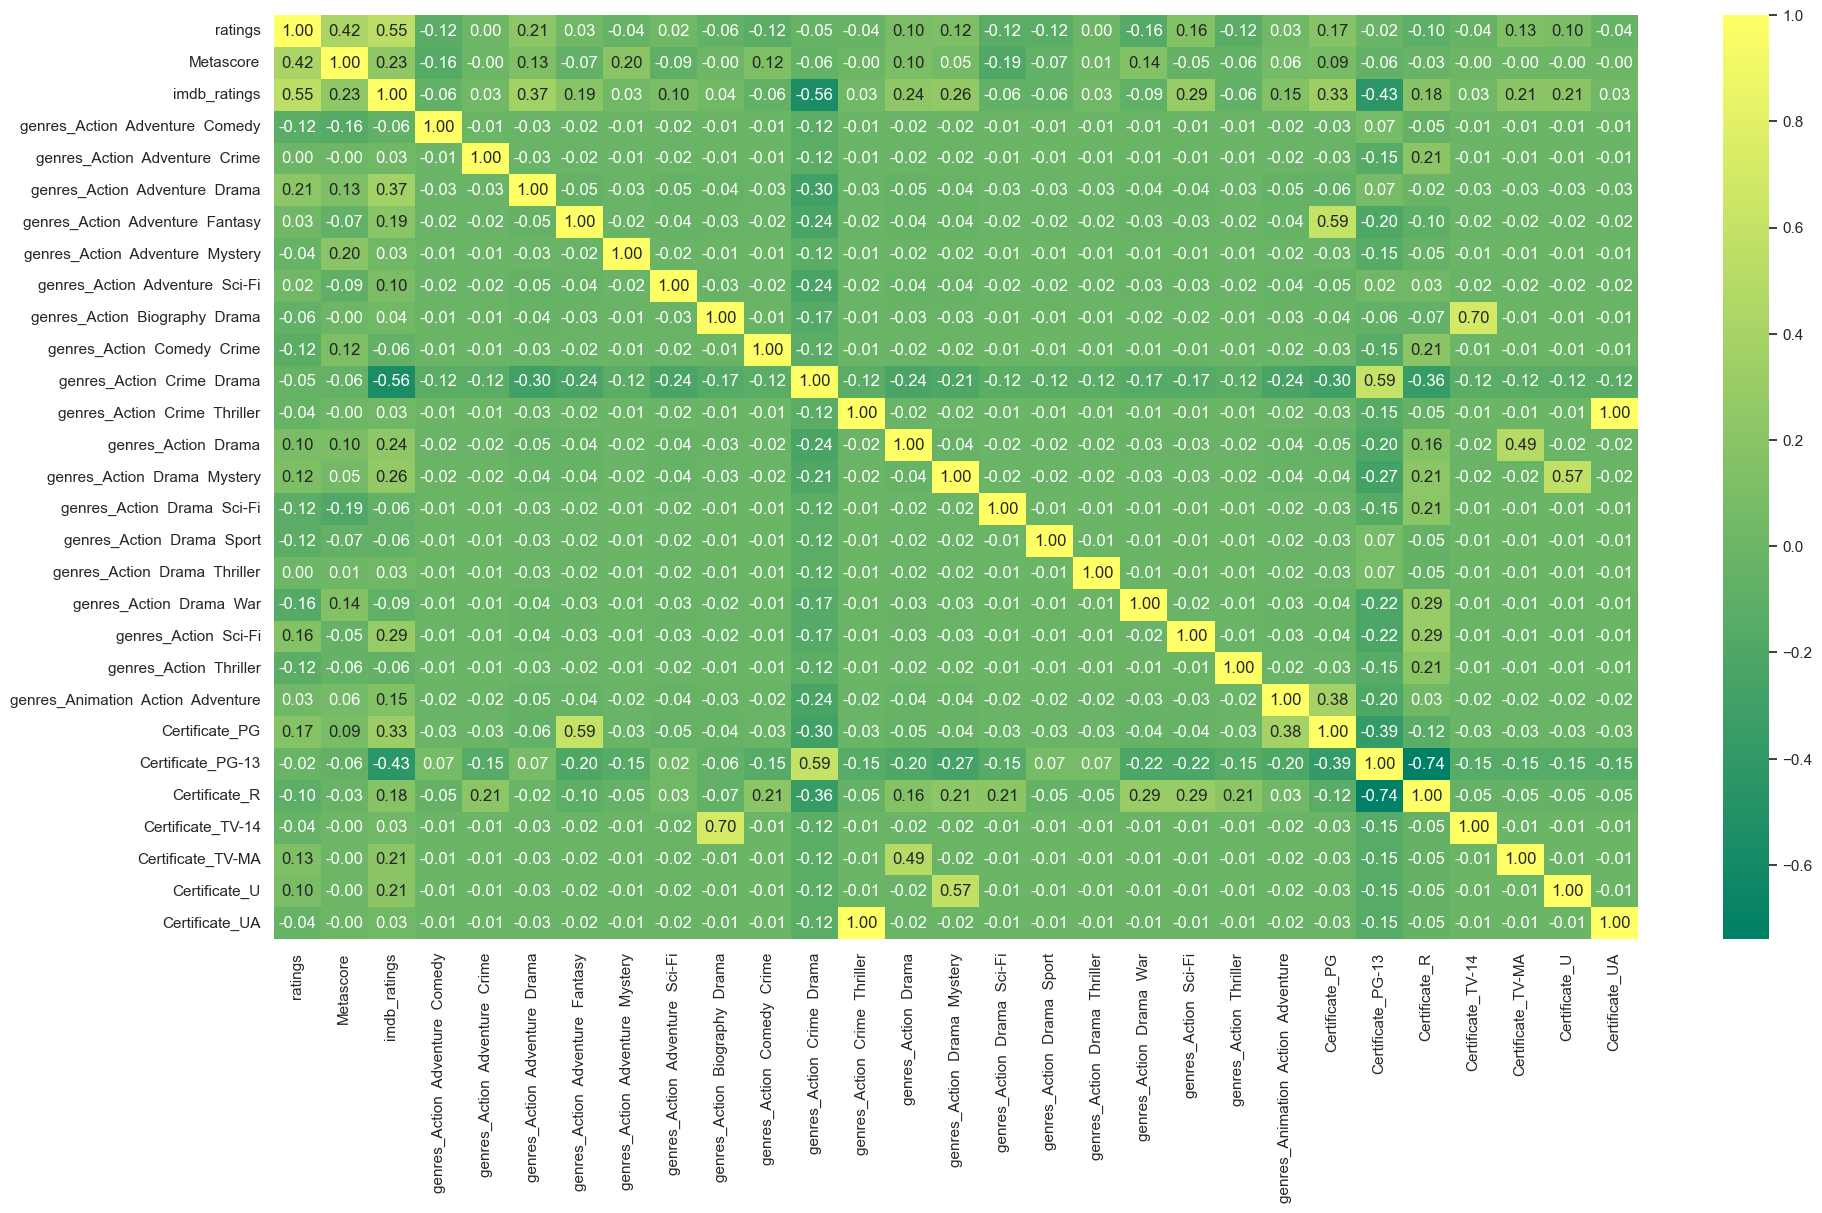

In [247]:
# heatmap correlation
plt.figure(figsize = (22,12))
sns.heatmap(df_new.corr(), annot=True,cmap='summer',fmt='.2f')
plt.show()

In [253]:
df_new

,movie_name,ratings,Metascore,durations,imdb_ratings,votes,genres_Action Adventure Comedy,genres_Action Adventure Crime,genres_Action Adventure Drama,genres_Action Adventure Fantasy,genres_Action Adventure Mystery,genres_Action Adventure Sci-Fi,genres_Action Biography Drama,genres_Action Comedy Crime,genres_Action Crime Drama,genres_Action Crime Thriller,genres_Action Drama,genres_Action Drama Mystery,genres_Action Drama Sci-Fi,genres_Action Drama Sport,genres_Action Drama Thriller,genres_Action Drama War,genres_Action Sci-Fi,genres_Action Thriller,genres_Animation Action Adventure,Certificate_PG,Certificate_PG-13,Certificate_R,Certificate_TV-14,Certificate_TV-MA,Certificate_U,Certificate_UA
0,Spider-Man: Across the Spider-Verse,1.249001e-16,0.914307,140 min,-1.387779e-17,1 014 909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,The Dark Knight,1.110223e-16,0.715243,152 min,-1.387779e-17,1 014 909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,The Lord of the Rings: The Return of the King,1.110223e-16,1.664139,201 min,-1.387779e-17,1 014 909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,Inception,8.326673e-17,-0.362041,148 min,-1.387779e-17,1 014 909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,The Lord of the Rings: The Fellowship of the Ring,8.326673e-17,1.483226,178 min,-1.387779e-17,1 014 909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
5,The Lord of the Rings: The Two Towers,8.326673e-17,1.012003,179 min,-1.387779e-17,1 014 909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,The Matrix,6.938894e-17,-0.478174,136 min,-1.387779e-17,1 014 909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
7,Star Wars: Episode V - The Empire Strikes Back,6.938894e-17,0.511080,124 min,-1.387779e-17,1 014 909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,Soorarai Pottru,6.938894e-17,-0.023381,153 min,-1.387779e-17,1 014 909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9,Star Wars,5.551115e-17,1.298082,121 min,-1.387779e-17,1 014 909,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [272]:
df

,movie_name,ratings,Metascore,durations,Certificate,genres,imdb_ratings,votes
0,Spider-Man: Across the Spider-Verse,1.249001e-16,0.914307,140 min,PG-13,Action Crime Drama,-1.387779e-17,1 014 909
1,The Dark Knight,1.110223e-16,0.715243,152 min,PG-13,Action Crime Drama,-1.387779e-17,1 014 909
2,The Lord of the Rings: The Return of the King,1.110223e-16,1.664139,201 min,PG-13,Action Crime Drama,-1.387779e-17,1 014 909
3,Inception,8.326673e-17,-0.362041,148 min,PG-13,Action Crime Drama,-1.387779e-17,1 014 909
4,The Lord of the Rings: The Fellowship of the Ring,8.326673e-17,1.483226,178 min,PG-13,Action Crime Drama,-1.387779e-17,1 014 909
5,The Lord of the Rings: The Two Towers,8.326673e-17,1.012003,179 min,PG-13,Action Crime Drama,-1.387779e-17,1 014 909
6,The Matrix,6.938894e-17,-0.478174,136 min,PG-13,Action Crime Drama,-1.387779e-17,1 014 909
7,Star Wars: Episode V - The Empire Strikes Back,6.938894e-17,0.511080,124 min,PG-13,Action Crime Drama,-1.387779e-17,1 014 909
8,Soorarai Pottru,6.938894e-17,-0.023381,153 min,PG-13,Action Crime Drama,-1.387779e-17,1 014 909
9,Star Wars,5.551115e-17,1.298082,121 min,PG-13,Action Crime Drama,-1.387779e-17,1 014 909


In [273]:
# Regression Problem (Votes)
# Votes is the target feature now.
x = df_new.drop('votes',axis=1)
y = df_new['votes']

In [274]:
x = df_new.drop('movie_name','durations',axis=1)

TypeError: drop() got multiple values for argument 'axis'

In [275]:
x = df_new.drop('movie_name','durations','Certificate',axis=1)

TypeError: drop() got multiple values for argument 'axis'

In [271]:
# Standarization
sc= StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns = x.columns)

ValueError: could not convert string to float: 'Spider-Man: Across the Spider-Verse'

In [265]:
# SKB
SKB = SelectKBest(f_classif, k=17).fit(x, y )
l3_skb = x.columns[SKB.get_support()]
l3_skb

ValueError: could not convert string to float: '140 min'

In [266]:
VIF check Multicollinarity
x = x[final_list]
y = y

SyntaxError: invalid syntax (2442580043.py, line 1)

In [ ]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns

In [ ]:
vif.sort_values(by='VIF_Factor', ascending=False, inplace=True)
vif

# ML Alogs


In [ ]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)

    lr= LinearRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

In [ ]:
# Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=max_RS)

In [ ]:
# Linear Regression
lr=LinearRegression()
lr.fit(x_train,y_train)
pred_train=lr.predict(x_train)
pred_test=lr.predict(x_test)
score_train=r2_score(y_train,pred_train)
score_test=r2_score(y_test,pred_test)
mse = mean_squared_error(y_test, pred_test)

print('R2_Score_train: ',score_train)
print('R2_Score_test: ',score_test)
print('RMSE = ', np.sqrt(mse).round(4))
print('The mean absolute error = ', mean_absolute_error(y_test, pred_test))

In [ ]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-LR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
Cross Validation
for i in range(2,11):
    cv_score=cross_val_score(lr,x,y,scoring='r2',cv=i)
    cv_mean= cv_score.mean()
    cv_std= cv_score.std()
    print(f'At Cross fold {i} the cv score mean is {cv_mean*100} and the cv score std is {cv_std},testing accuracy score= {score_test*100}')
    print('\n')

# Polynomial with Regularization techniques


In [ ]:
# Define the degree of polynomial features
degree = 2

# Create an instance of PolynomialFeatures
poly_features = PolynomialFeatures(degree=degree)

# Fit and transform the training features to polynomial features
X_train_poly = poly_features.fit_transform(x_train)

# Transform the testing features to polynomial features
X_test_poly = poly_features.transform(x_test)

# Ridge

In [ ]:
# Create an instance of Ridge regression
ridge_model = Ridge()

ridge_model.fit(X_train_poly, y_train)

pred_train_ridge=ridge_model.predict(X_train_poly)
pred_test_ridge = ridge_model.predict(X_test_poly)

score_train=r2_score(y_train,pred_train_ridge)
score_test=r2_score(y_test,pred_test_ridge)
mse = mean_squared_error(y_test, pred_test_ridge)


# Print the mean squared error
print('R2_Score_train: ',score_train)
print('R2_Score_test: ',score_test)
print('RMSE = ', np.sqrt(mse).round(4))
print('The mean absolute error = ', mean_absolute_error(y_test, pred_test_ridge))

In [ ]:
# Create an instance of Ridge regression
ridge_model = Ridge()

ridge_model.fit(X_train_poly, y_train)

pred_train_ridge=ridge_model.predict(X_train_poly)
pred_test_ridge = ridge_model.predict(X_test_poly)

score_train=r2_score(y_train,pred_train_ridge)
score_test=r2_score(y_test,pred_test_ridge)
mse = mean_squared_error(y_test, pred_test_ridge)


# Print the mean squared error
print('R2_Score_train: ',score_train)
print('R2_Score_test: ',score_test)
print('RMSE = ', np.sqrt(mse).round(4))
print('The mean absolute error = ', mean_absolute_error(y_test, pred_test_ridge))

In [ ]:
sns.regplot(x=y_test,y=pred_test_ridge)
plt.title("Model-Ridge")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
# Create an instance of Lasso regression
lasso_model = Lasso()


lasso_model.fit(X_train_poly, y_train)

pred_train_lasso=lasso_model.predict(X_train_poly)
pred_test_lasso = lasso_model.predict(X_test_poly)

score_train=r2_score(y_train,pred_train_ridge)
score_test=r2_score(y_test,pred_test_ridge)
mse = mean_squared_error(y_test, pred_test_lasso)


# Print the mean squared error
print('R2_Score_train: ',score_train)
print('R2_Score_test: ',score_test)
print('RMSE = ', np.sqrt(mse).round(4))
print('The mean absolute error = ', mean_absolute_error(y_test, pred_test_lasso))

In [ ]:
sns.regplot(x=y_test,y=pred_test_lasso)
plt.title("Model-Lasso")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# KNN


In [ ]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
   
    knn = KNeighborsRegressor()
    knn.fit(x_train,y_train)
    pred = knn.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred_train=knn.predict(x_train)
pred_test = knn.predict(x_test)
print('The r2 score_train is:', r2_score(y_train, pred_train))
print('The r2 score_test is:', r2_score(y_test, pred_test))
print('The mean absolute error', mean_absolute_error(y_test, pred_test))
print('The mean squared error', mean_squared_error(y_test, pred_test))
cv = cross_val_score(knn, x,y,cv=10)
print('The cross validation score', cv.mean())

In [ ]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-KNN")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# SVR


In [ ]:
#Selecting the best random state to get maximum accuracy.

max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)

    svr = SVR()
    svr.fit(x_train,y_train)
    pred = svr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

In [ ]:
#Selecting the best random state to get maximum accuracy.

max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)

    svr = SVR()
    svr.fit(x_train,y_train)
    pred = svr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

In [ ]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-SVR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Decision Tree Regressor


In [ ]:
#Selecting the best random state to get maximum accuracy.

max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
  
    dtr = DecisionTreeRegressor()
    dtr.fit(x_train,y_train)
    pred = dtr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred_train=dtr.predict(x_train)
pred_test= dtr.predict(x_test)
print('The r2 score_train is:', r2_score(y_train, pred_train))
print('The r2 score_test is:', r2_score(y_test, pred_test))
print('The mean absolute error', mean_absolute_error(y_test, pred_test))
print('The mean squared error', mean_squared_error(y_test, pred_test))
cv = cross_val_score(dtr, x,y,cv=10)
print('The cross validation score', cv.mean())



In [ ]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-DT")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# Ensembels Techniques

# Random Forest Regressor

In [ ]:


#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
   
    rfr = RandomForestRegressor()
    rfr.fit(x_train,y_train)
    pred = rfr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)
pred_train=rfr.predict(x_train)
pred_test= rfr.predict(x_test)

In [ ]:

print('The r2 score_train is:', r2_score(y_train, pred_train))
print('The r2 score_test is:', r2_score(y_test, pred_test))
print('The mean absolute error', mean_absolute_error(y_test, pred_test))
print('The mean squared error', mean_squared_error(y_test, pred_test))
cv = cross_val_score(rfr, x,y,cv=10)
print('The cross validation score', cv.mean())

In [ ]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-RFR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# GB Regressor

In [ ]:

#Selecting the best random state to get maximum accuracy.

max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
   
    gbr=GradientBoostingRegressor()
    gbr.fit(x_train,y_train)
    pred=gbr.predict(x_test)
    acc = r2_score(y_test, pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)


In [ ]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred_train=gbr.predict(x_train)
pred_test = gbr.predict(x_test)
print('The r2 score_train is:', r2_score(y_train, pred_train))
print('The r2 score_test is:', r2_score(y_test, pred_test))
print('The mean absolute error', mean_absolute_error(y_test, pred_test))
print('The mean squared error', mean_squared_error(y_test, pred_test))
cv = cross_val_score(gbr, x,y,cv=10)
print('The cross validation score', cv.mean())

In [ ]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-GBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# ADABRegressor


In [ ]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)

    
    adr=AdaBoostRegressor()
    adr.fit(x_train,y_train)
    adr_pred=adr.predict(x_test)
    acc = r2_score(y_test, adr_pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred_train=adr.predict(x_train)
pred_test = adr.predict(x_test)
print('The r2 score_train is:', r2_score(y_train, pred_train))
print('The r2 score_test is:', r2_score(y_test, pred_test))
print('The mean absolute error', mean_absolute_error(y_test, pred_test))
print('The mean squared error', mean_squared_error(y_test, pred_test))
cv = cross_val_score(adr, x,y,cv=10)
print('The cross validation score', cv.mean())

In [ ]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-ADAB Regressor")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

# XGB Regressor

In [ ]:
#Selecting the best random state to get maximum accuracy.
max_acc=0
max_RS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)

    xgb=XGBRegressor()
    xgb.fit(x_train,y_train)
    xgb_pred=xgb.predict(x_test)
    acc = r2_score(y_test, xgb_pred)
    if acc > max_acc:
        max_acc= acc
        max_RS=i
print("The max accuracy is",max_acc, 'seen for random state:',max_RS)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=max_RS)

pred_train=xgb.predict(x_train)
pred_test= xgb.predict(x_test)
print('The r2 score_train is:', r2_score(y_train, pred_train))
print('The r2 score_test is:', r2_score(y_test, pred_test))
print('The mean absolute error', mean_absolute_error(y_test, pred_test))
print('The mean squared error', mean_squared_error(y_test, pred_test))
cv = cross_val_score(xgb, x,y,cv=10)
print('The cross validation score', cv.mean(),cv.std())

In [ ]:
sns.regplot(x=y_test,y=pred_test)
plt.title("Model-XGBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
np.random.seed(10)

def rmse_cv(model, x, y):
    rmse = -cross_val_score(model, x, y, scoring='neg_mean_squared_error', cv=10)
    return (rmse)

models = [LinearRegression(), Ridge(), Lasso(), SVR(), KNeighborsRegressor(),
          DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(),
          AdaBoostRegressor(), XGBRegressor()]

names = ['lr', 'ridge', 'lasso', 'svr', 'knn', 'dtr', 'rfr', 'gbr', 'adr', 'xgb']

for model, name in zip(models, names):
    score = rmse_cv(model, x, y)
    print("{}: {:.6f}, {:.6f}".format(name, score.mean(), score.std()))

## Best two for cross validation are XGB and RF regressors but XGB regressor is also better in r2 score so i will go with XGBR

# The best Algorithim is XGB Regressor

In [ ]:
# Tunning Hyperparameters for XGB Regressor

# Define the parameter grid
params = {
    'n_estimators': [100, 200,500,700,1000],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3,5,7,9],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8,1],
    'min_child_weight': [1,5,10]
}

xgb_tuned= GridSearchCV(XGBRegressor(),params,scoring='r2',cv =10,n_jobs=-1,verbose=True)
xgb_tuned.fit(x_train,y_train)
y_pred=xgb_tuned.predict(x_test)
print('The r2 score is:', r2_score(y_test, y_pred))
print("\n The best estimator across ALL searched params:\n", xgb_tuned.best_estimator_)
print("\n The best score across ALL searched params:\n", xgb_tuned.best_score_)
print("\n The best parameters across ALL searched params:\n",xgb_tuned.best_params_)

In [ ]:
# Reinstating with tuned parameters
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=53)

xgb_model = XGBRegressor(n_estimators= 1000,max_depth=5,colsample_bytree=0.8, learning_rate=0.01,min_child_weight=5
                         ,subsample=0.8).fit(x_train,y_train)

pred_train=xgb_model.predict(x_train)
pred_test= xgb_model.predict(x_test)
print('The r2 score_train is: ', r2_score(y_train, pred_train))
print('The r2 score_test is: ', r2_score(y_test, pred_test))
print('The mean absolute error ', mean_absolute_error(y_test, pred_test))
print('root_mean_squared_error: ',np.sqrt(mean_squared_error(y_test,pred_test)))

In [ ]:
cv = cross_val_score(xgb_model, x,y,cv=10)
print('The cross validation score', cv.mean())


In [ ]:

sns.regplot(x=y_test,y=pred_test)
plt.title("Tunned-XGBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
# Train the final model using the best hyperparameters
final_model = XGBRegressor(**best_params)
final_model.fit(x, y)

In [ ]:
pred_train=final_model.predict(x_train)
pred_test= final_model.predict(X_valid)
print('The r2 score_train is: ', r2_score(y_train, pred_train))
print('The r2 score_test is: ', r2_score(y_valid, pred_test))
print('The mean absolute error ', mean_absolute_error(y_valid, pred_test))
print('mean_squared_error: ',mean_squared_error(y_valid,pred_test))
print('root_mean_squared_error: ',np.sqrt(mean_squared_error(y_valid,pred_test)))

In [ ]:
# Calculate the cross-validation score with the final model
cv_scores = cross_val_score(final_model, x, y, cv=10)

# Optuna maximizes the objective function, so negate the mean squared error
avg_mse = cv_scores.mean()

print("Cross-validation score :", avg_mse)

In [ ]:
sns.regplot(x=y_valid,y=pred_test)
plt.title("Tunned-XGBR")
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [ ]:
# Conclusion
'''After using two different techniques of tunning the parameters of XGB regressor Algorithm. {GridSearchCV & OPTUNA}

The OPTUNA one was better than GridSearch in all the evaluation metrics also in the cross validation performance, But the orginal XGB Model before tunning is the best one in all the evaluation metrics but not in the CV as it score almost 69% Therefor i will go with the Orginal XGB regressor Model to be my Final used Model.

Evaluation Metrics & CV results:

The r2 score_train is: 0.9640231870805867 The r2 score_test is: 0.9649652072816183 The mean absolute error 0.08412008636617131 The mean squared error 0.03505796537082887 The cross validation score 0.6855904184521384 0.10822372247578255'''



In [ ]:
# Saving the Model


In [ ]:
#Saving the model using .pkl
import joblib
joblib.dump(xgb,'E:/DataTrained/Capstone_Project/IMDB_XGB.pkl')



In [ ]:
# load model and get predictions

model_1=joblib.load('E:/DataTrained/Capstone_Project/IMDB_XGB.pkl')

In [ ]:
#Predict

prediction_1 = model.predict(x_test)
pd.DataFrame([model_1.predict(x_test)[:], y_test[:]], index = ['Predicted', 'Original'])